In [25]:
from match import *  
PrevTour = None
counter = 1
with open("Data.txt","w") as f:
    f.write("Data = [ ")

<h5>Input parameters</h5>

In [ ]:
#Layer size
Agent.LAYER_SIZES =[9, 8, 4, 9]
# Generation size
n = 7
m = int(pow(2, n))           
#Reproduction values
# Keep=m // 2 + m // 32
# Mixes=m // 16
# Selections=m // 16
# SingleMutations=m // 16
# SlabMutations=m // 32
# RainMutations=m // 16
KeepPercentage = 0.8
Keep:int=int(m*KeepPercentage)
Mixes:int=int(m*(1-KeepPercentage)*2/12)
Selections:int=int(m*(1-KeepPercentage)*2/12)
SingleMutations:int=int(m*(1-KeepPercentage)*2/12)
SlabMutations:int=int(m*(1-KeepPercentage)/12)
RainMutations:int=int(m*(1-KeepPercentage)*2/12)
#Iteration count
Iterations = 12000
#Play with prev
PlayWithPrev = True
RunName="Final"

In [27]:
turnament = Tournament(n - 1) if PrevTour == None else PrevTour
print(turnament)

from math import log
from statistics import mean

while counter<=Iterations:
    turnament.rankOld()
    # GenData = [   
    #             Match(turnament.ranking[i], turnament.ranking[i + 1]).getResult(
    #                 False
    #             )
    #             for i in range(0, len(turnament.ranking), 2)
    #         ]
    # GenData = [(x,z) for x,y,z,w in GenData]
    # GenData = [x for par in GenData for x in par]
    # if PlayWithPrev and PrevTour:
    #     for X in turnament.ranking[:int(log(len(turnament.ranking)))]:
    #         for Y in PrevTour.ranking:
    #             Match(X,Y).getResult()
    # if PrevTour:
    #     attempt.append((mean([compare(PrevTour.ranking[i],turnament.ranking[i]) for i in range(len(turnament.ranking))])+1)/2)
    GenData = [fitness(agent) for agent in turnament.ranking]



    with open("Data.txt", "a") as f:
        f.write(str(GenData) + ", ")

    with open("Best.py", "w") as f:
        f.write("BestAgent = "+str(turnament.ranking[0].flattened()))
    
    counter += 1
    

    print(counter)
    # print(
    #     Match(turnament.ranking[0], turnament.ranking[1]).getResult(
    #          False
    #     )
    # )
    PrevTour = turnament
    turnament = Tournament(
        reproduce(
            turnament.ranking,
            Keep=Keep,
            Mixes=Mixes,
            Selections=Selections,
            SingleMutations=SingleMutations,
            SlabMutations=SlabMutations,
            RainMutations=RainMutations
        )
    )

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


KeyboardInterrupt: 

In [ ]:
from os import system
system("copy Data.txt Data.py")
with open("Data.py", "a") as f:
            f.write("]")
system("copy Data.py \"Data_"+RunName+".py\"")

0

In [ ]:
import Data 
import importlib
from statistics import mode, median
importlib.reload(Data)
 
Max = [max([val for val in gen]) for gen in Data.Data]
Avg = [sum([val for val in gen])/len(gen) for gen in Data.Data]
Mode =[mode([val for val in gen]) for gen in Data.Data]
Median =[median([val for val in gen]) for gen in Data.Data]

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.16567e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


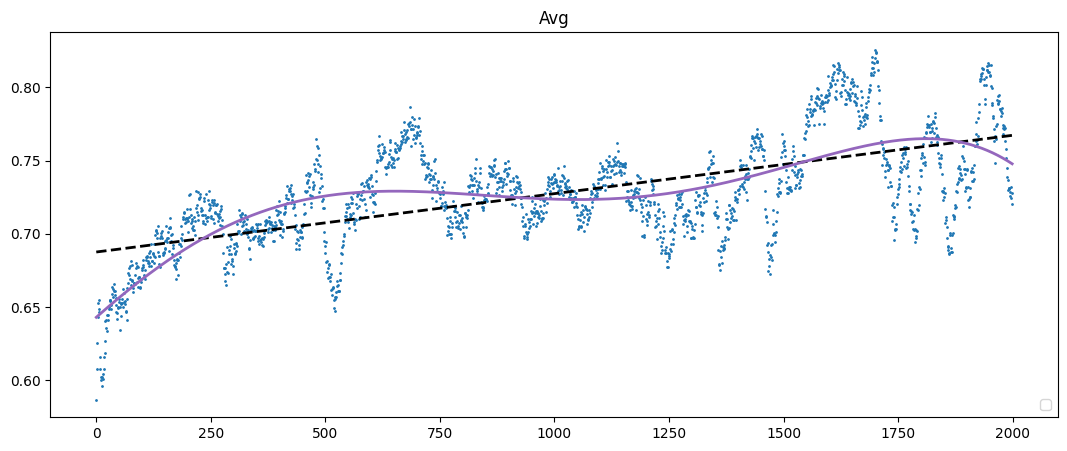

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.16567e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

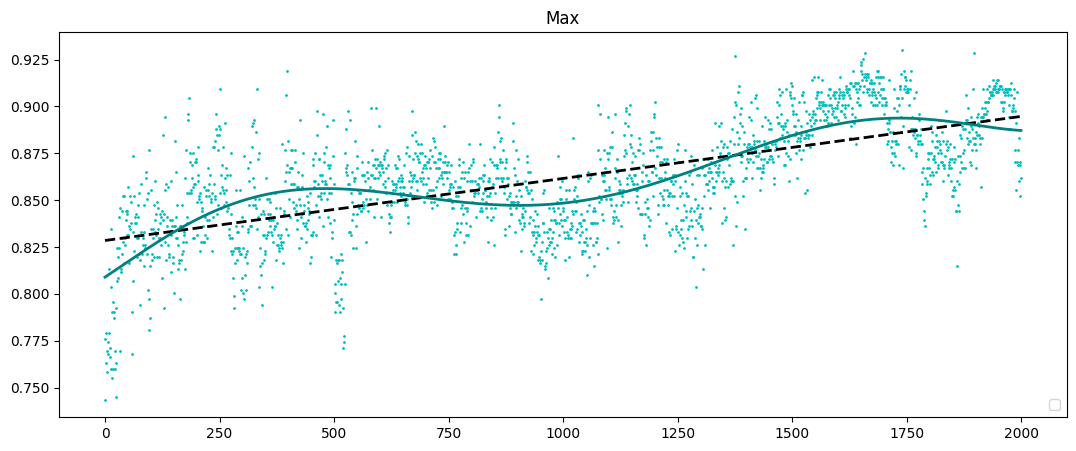

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.16567e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

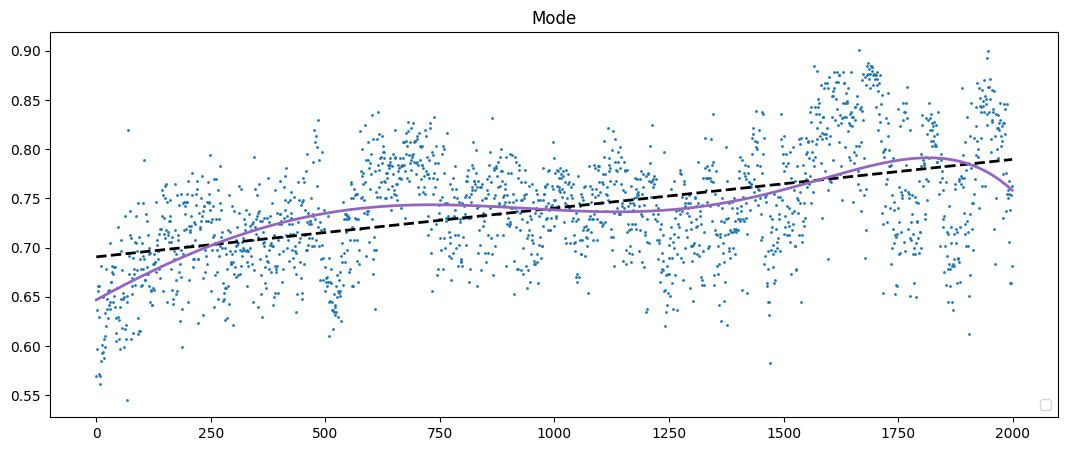

c:\Users\bojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.16567e-46): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

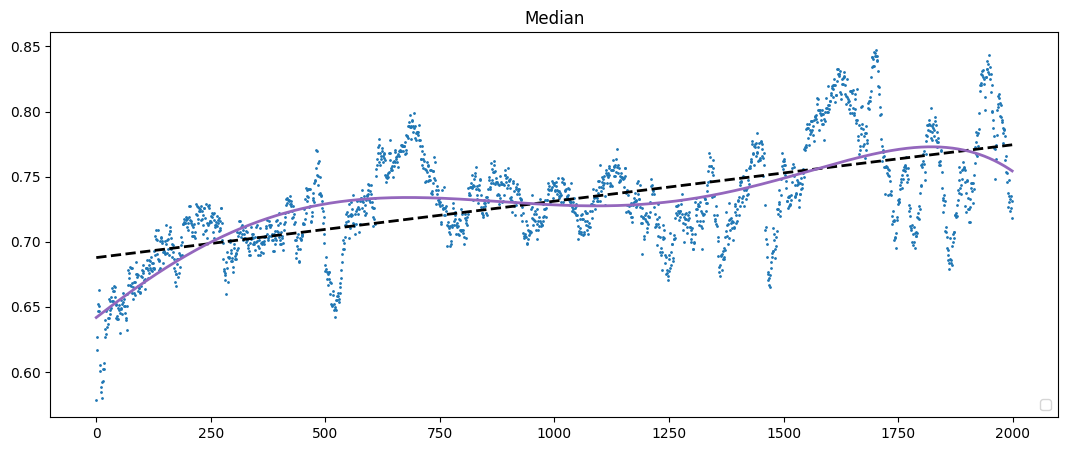

<Figure size 640x480 with 0 Axes>

In [ ]:
import Ploter as plt
importlib.reload(plt)

plt.plot(Avg,[1,6],{1: 'black', "plot":"tab:blue", 6:"tab:purple" },{1:'--',6:'-'},"Avg")
plt.plot(Max,[1,6],{1: 'black', "plot":"c" , 6: "teal"},{1:'--',6:'-'},"Max")
plt.plot(Mode,[1,6],{1: 'black', "plot":"tab:blue", 6:"tab:purple" },{1:'--',6:'-'},"Mode")
plt.plot(Median,[1,6],{1: 'black', "plot":"tab:blue", 6:"tab:purple" },{1:'--',6:'-'},"Median")
# plt.plot(attempt,[1,6],{1: 'black', "plot":"tab:blue", 6:"tab:purple" },{1:'--',6:'-'},"Prev")